In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

print(train.shape, test.shape, sample_submission.shape)
print(train.head())

(30858, 10) (13225, 9) (13225, 2)
            ID   age gender  tenure  frequent  payment_interval  \
0  TRAIN_00000  54.0      F    47.0      22.0               8.0   
1  TRAIN_00001  30.0      M    16.0      15.0               5.0   
2  TRAIN_00002  29.0      M     8.0      30.0              21.0   
3  TRAIN_00003  38.0      F    38.0      23.0              10.0   
4  TRAIN_00004  25.0      F    52.0       3.0              17.0   

  subscription_type  contract_length  after_interaction  support_needs  
0            member               90               25.0              0  
1               vip              360               23.0              0  
2              plus               30               21.0              0  
3               vip               90                6.0              0  
4            member               30                1.0              2  


In [ ]:
# 결측치 확인

if train.isnull().sum().sum() == 0:
    print("결측치 없음")
else:
    print("결측치 존재")

missing = train.isnull().sum() / len(train)
missing = missing[missing > 0].sort_values(ascending=False)
missing

결측치 없음


Series([], dtype: float64)

In [ ]:
# 수치형/범주형 변수 분리

num_cols = train.select_dtypes(include=['int64', 'float64']).columns
cat_cols = train.select_dtypes(include=['object']).columns

print("수치형 변수:", list(num_cols))
print("범주형 변수:", list(cat_cols))

수치형 변수: ['age', 'tenure', 'frequent', 'payment_interval', 'contract_length', 'after_interaction', 'support_needs']
범주형 변수: ['ID', 'gender', 'subscription_type']


In [11]:
print(train.columns)

Index(['ID', 'age', 'gender', 'tenure', 'frequent', 'payment_interval',
       'subscription_type', 'contract_length', 'after_interaction',
       'support_needs'],
      dtype='object')


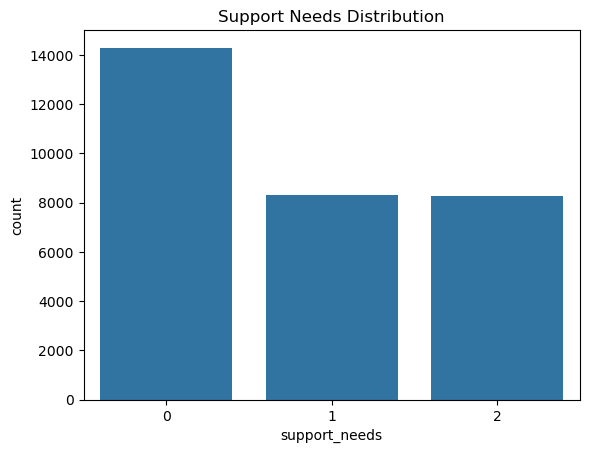

In [12]:
# 타깃 변수 분포 확인

sns.countplot(x='support_needs', data=train)
plt.title("Support Needs Distribution")
plt.show()

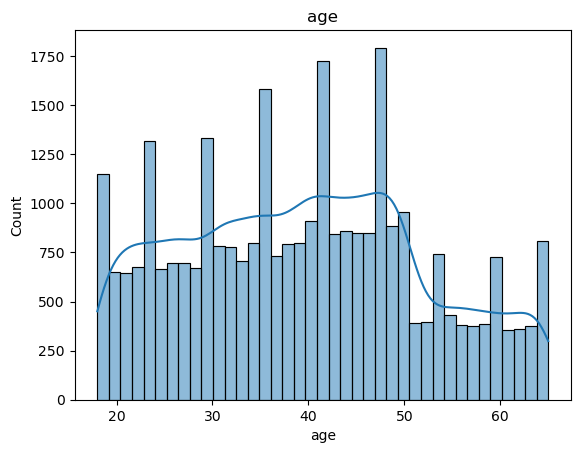

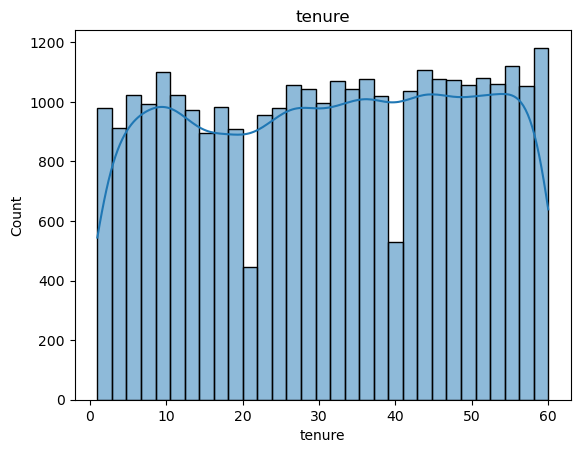

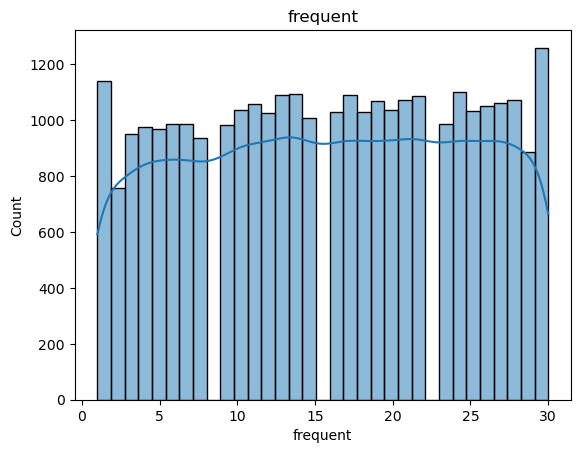

In [ ]:
# 주요 변수 시각화

for col in num_cols[:3]:  # 상위 3개만 예시
    sns.histplot(train[col], kde=True)
    plt.title(col)
    plt.show()